# Rolling Planning
> Plannunghorizont je 3 Tage
> 
> Für 4 Planungstage

In [2]:
import json
import pandas as pd

In [3]:
# Basics
import utils.basics.presenter as show
import utils.basics.converter as convert

import utils.checker as check
import utils.rolling_planning as rp

In [4]:
import utils.schedule_solver__with_arrivals as ssv_a
import utils.reschedule.schedule_solver__arrival as rssv_a

In [5]:
from ProductionDaySimulation import ProductionDaySimulation

In [6]:
# Datei laden
with open("data/jobshop_instances.json", "r", encoding="utf-8") as f:
    jobshop_instances = json.load(f)

instance =  jobshop_instances["instance ft10"]
df_instance = convert.jssp_dict_to_df(instance)
df_instance

,Job,Operation,Machine,Processing Time
0,job 0,0,M0,29
1,job 0,1,M1,78
2,job 0,2,M2,9
3,job 0,3,M3,36
4,job 0,4,M4,49
...,...,...,...,...
95,job 9,5,M9,76
96,job 9,6,M5,47
97,job 9,7,M3,52
98,job 9,8,M4,90


In [7]:
df_jssp, df_times = rp.init_jobs_with_arrivals(df_instance, 6,  u_b_mmax= 0.9)
df_jssp

,Job,Operation,Machine,Processing Time
0,Job_000,0,M0,29
1,Job_000,1,M1,78
2,Job_000,2,M2,9
3,Job_000,3,M3,36
4,Job_000,4,M4,49
...,...,...,...,...
1135,Job_113,5,M9,76
1136,Job_113,6,M5,47
1137,Job_113,7,M3,52
1138,Job_113,8,M4,90


In [8]:
df_times

,Job,Arrival
0,Job_000,0.00
1,Job_001,88.05
2,Job_002,152.78
3,Job_003,207.97
4,Job_004,246.61
...,...,...
109,Job_109,8390.89
110,Job_110,8397.28
111,Job_111,8398.72
112,Job_112,8524.04


In [9]:
solver_limit = 60*40

## I) Day 0

In [11]:
day_start = 0
day_end = day_start + 1440
planning_end = day_start + 3*1440

### a) Filtern

In [13]:
time_filter = (df_times["Arrival"] >= day_start) & (df_times["Arrival"] < planning_end)

df_times_filtered = df_times[time_filter]
df_times_filtered

,Job,Arrival
0,Job_000,0.00
1,Job_001,88.05
2,Job_002,152.78
3,Job_003,207.97
4,Job_004,246.61
5,Job_005,319.39
6,Job_006,359.74
7,Job_007,515.63
8,Job_008,748.04
9,Job_009,781.95


In [14]:
df_jssp_filtered = df_jssp[df_jssp["Job"].isin(df_times_filtered["Job"])]
df_jssp_filtered

,Job,Operation,Machine,Processing Time
0,Job_000,0,M0,29
1,Job_000,1,M1,78
2,Job_000,2,M2,9
3,Job_000,3,M3,36
4,Job_000,4,M4,49
...,...,...,...,...
565,Job_056,5,M9,76
566,Job_056,6,M5,47
567,Job_056,7,M3,52
568,Job_056,8,M4,90


### b) Scheduling

In [16]:
df_plan, _ = ssv_a.solve_jssp_weighted_individual_flowtime(df_jssp_filtered, df_times_filtered, 
                                                  solver_time_limit = solver_limit)
df_plan

,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_000,0,0.00,M0,0.00,29,29.00,29.00
1,Job_000,1,0.00,M1,29.00,78,107.00,107.00
2,Job_000,2,0.00,M2,107.00,9,116.00,116.00
3,Job_000,3,0.00,M3,116.00,36,152.00,152.00
4,Job_000,4,0.00,M4,152.00,49,201.00,201.00
...,...,...,...,...,...,...,...,...
565,Job_056,5,4309.61,M9,5353.04,76,1119.43,5429.04
566,Job_056,6,4309.61,M5,5516.04,47,1253.43,5563.04
567,Job_056,7,4309.61,M3,5670.04,52,1412.43,5722.04
568,Job_056,8,4309.61,M4,5722.04,90,1502.43,5812.04


In [ ]:
df_plan.to_csv("data/04a_schedule_00.csv", index = False)

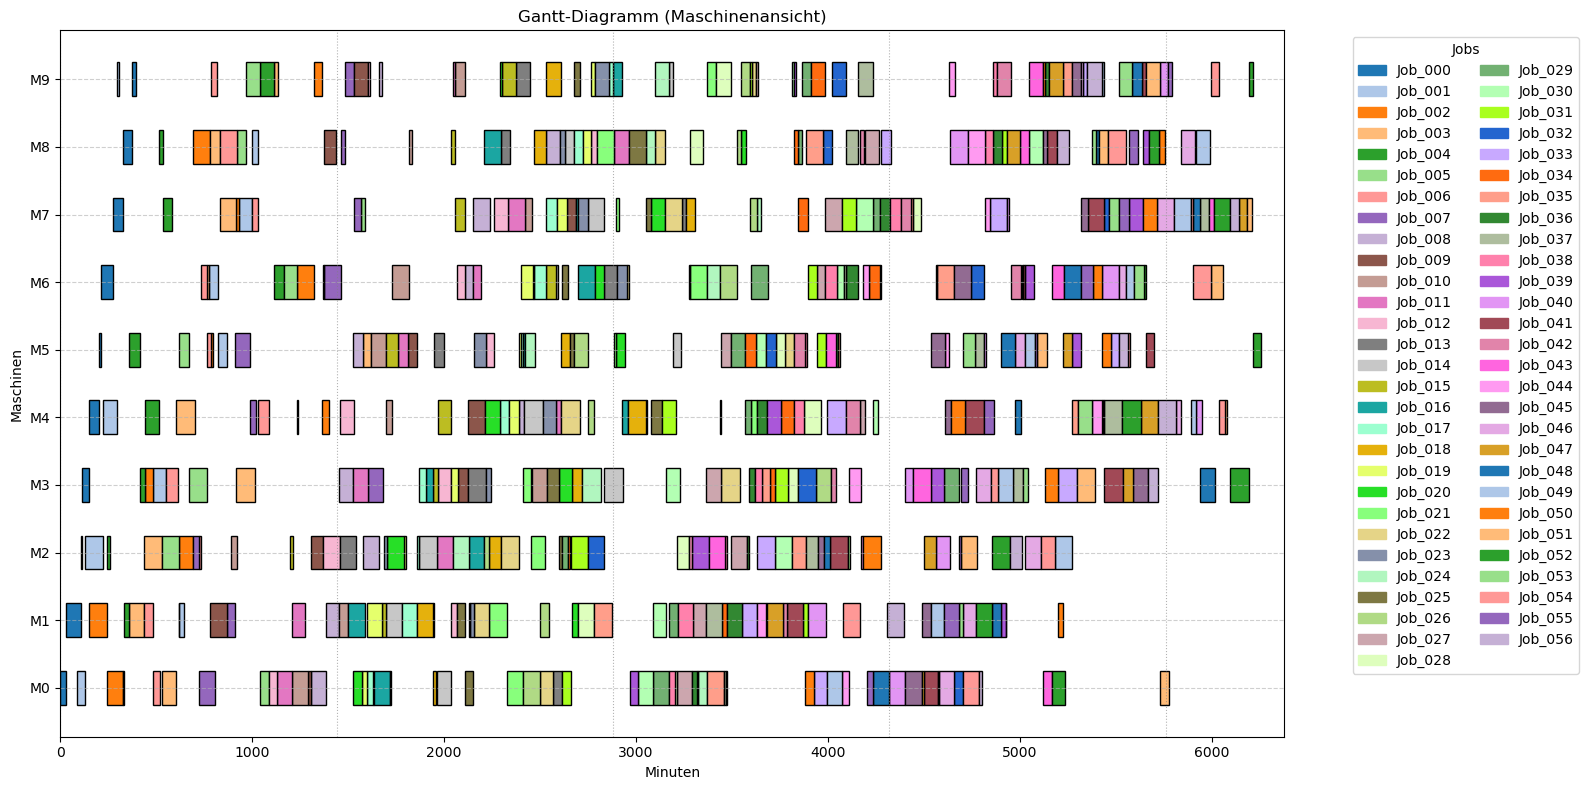

✅ Keine Maschinenkonflikte gefunden
✅ Für alle Jobs ist die Operationssequenz korrekt.
✅ Alle Operation starten erst nach Arrival des Job
✅ Zeitliche technologische Reihenfolge korrekt.

✅ Alle Constraints wurden erfüllt.



True

In [17]:
show.plot_gantt_machines(df_plan)
check.check_all_constraints(df_plan)

### c) Simulation

In [19]:
# Auf einen Tag filtern
filt = (df_plan["Start"] >=  day_start) & (df_plan["Start"] < day_end)
df_plan_single_day = df_plan[filt]
df_plan_single_day

,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_000,0,0.00,M0,0.00,29,29.00,29.00
1,Job_000,1,0.00,M1,29.00,78,107.00,107.00
2,Job_000,2,0.00,M2,107.00,9,116.00,116.00
3,Job_000,3,0.00,M3,116.00,36,152.00,152.00
4,Job_000,4,0.00,M4,152.00,49,201.00,201.00
...,...,...,...,...,...,...,...,...
110,Job_011,0,944.71,M0,1131.78,76,263.07,1207.78
111,Job_011,1,944.71,M1,1207.78,69,332.07,1276.78
120,Job_012,0,1003.56,M0,1088.78,43,128.22,1131.78
121,Job_012,1,1003.56,M2,1367.78,90,454.22,1457.78


In [20]:
simulation = ProductionDaySimulation(df_plan_single_day, vc=0.35)
df_execution, df_undone = simulation.run(start_time = day_start, end_time=day_end)

[00:00:00] Job_000 started on M0
[00:13:11] Job_000 finished on M0 (after 13 minutes 12 seconds)
[00:29:00] Job_000 started on M1
[01:28:02] Job_001 started on M0
[02:03:22] Job_001 finished on M0 (after 35 minutes 20 seconds)
[02:11:03] Job_001 started on M2
[02:16:35] Job_000 finished on M1 (after 107 minutes 36 seconds)
[02:32:46] Job_002 started on M1
[04:02:21] Job_001 finished on M2 (after 111 minutes 18 seconds)
[04:02:21] Job_000 started on M2
[04:02:21] Job_001 started on M4
[04:10:01] Job_002 finished on M1 (after 97 minutes 14 seconds)
[04:10:01] Job_002 started on M0
[04:11:36] Job_000 finished on M2 (after 09 minutes 16 seconds)
[04:11:36] Job_004 started on M2
[04:11:36] Job_000 started on M3
[04:30:46] Job_004 finished on M2 (after 19 minutes 10 seconds)
[05:01:06] Job_000 finished on M3 (after 49 minutes 29 seconds)
[05:05:44] Job_001 finished on M4 (after 63 minutes 23 seconds)
[05:05:44] Job_000 started on M4
[05:05:44] Job_001 started on M9
[05:10:39] Job_002 finishe

In [21]:
df_execution

,Job,Operation,Arrival,Machine,Start,Simulated Processing Time,Flow time,End
0,Job_000,0,0.00,M0,0.00,13.20,13.20,13.20
1,Job_000,1,0.00,M1,29.00,107.60,136.60,136.60
2,Job_000,2,0.00,M2,242.35,9.26,251.61,251.61
3,Job_000,3,0.00,M3,251.61,49.49,301.10,301.10
4,Job_000,4,0.00,M4,305.74,42.58,348.32,348.32
...,...,...,...,...,...,...,...,...
79,Job_011,0,944.71,M0,1165.42,112.34,333.05,1277.76
80,Job_011,1,944.71,M1,1277.76,114.29,447.34,1392.05
81,Job_012,0,1003.56,M0,1135.76,29.66,161.86,1165.42
82,Job_012,1,1003.56,M2,1367.78,74.45,438.67,1442.23


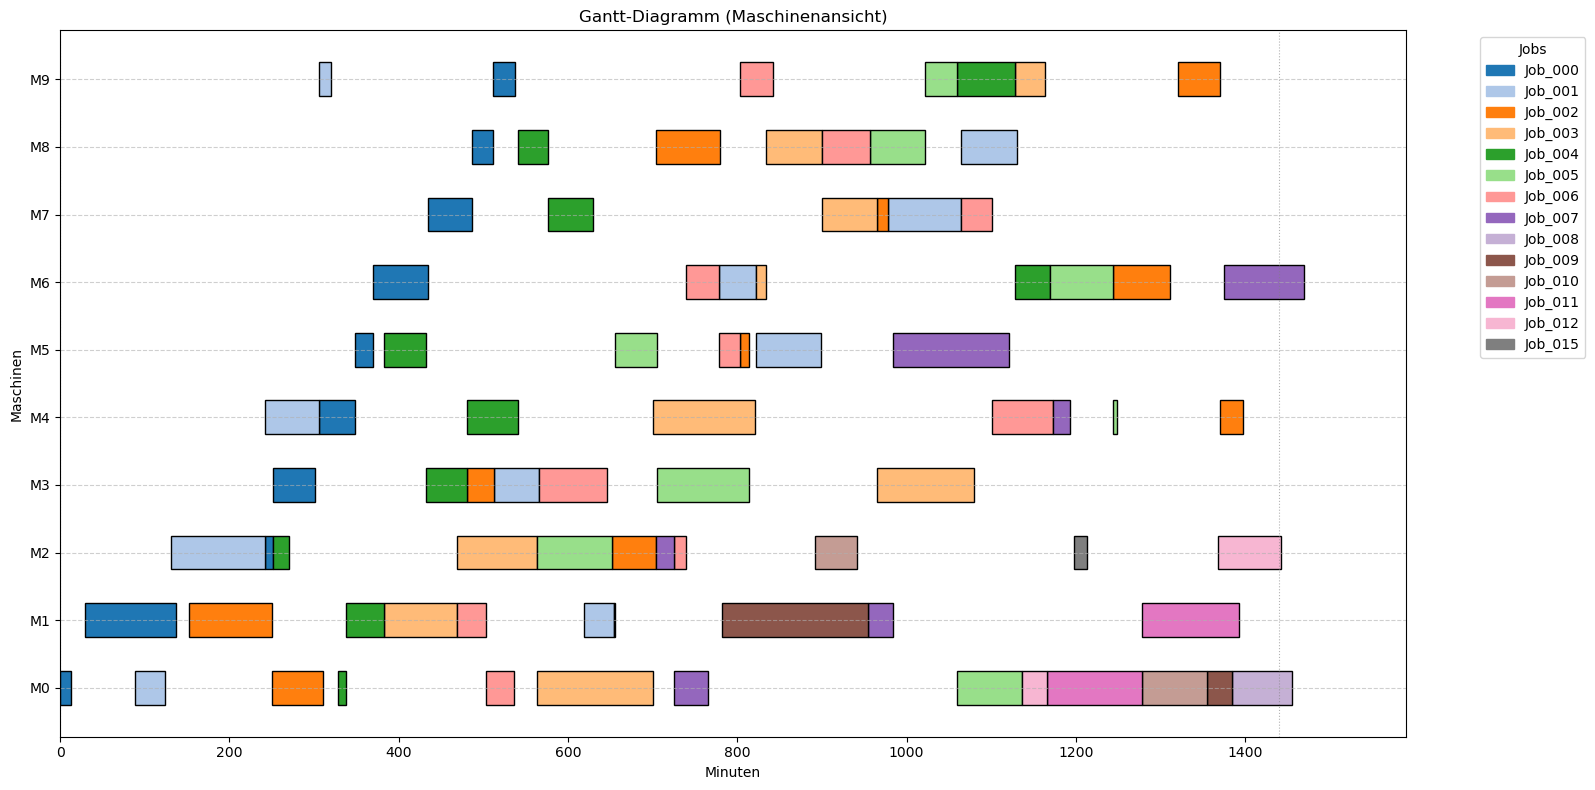

✅ Keine Maschinenkonflikte gefunden
✅ Für alle Jobs ist die Operationssequenz korrekt.
✅ Alle Operation starten erst nach Arrival des Job
✅ Zeitliche technologische Reihenfolge korrekt.

✅ Alle Constraints wurden erfüllt.



True

In [22]:
show.plot_gantt_machines(df_execution, duration_column = "Simulated Processing Time")
check.check_all_constraints(df_execution)

In [23]:
df_undone

,Job,Operation,Arrival,Machine,Planned Start,Processing Time
1,Job_009,2,781.95,M2,1306.78,61
2,Job_009,3,781.95,M6,1367.78,7
3,Job_009,4,781.95,M8,1374.78,64
0,Job_008,1,748.04,M1,1382.78,69


In [24]:
### d) 

## II) Day 1

In [26]:
day_start = 1440
day_end = day_start + 1440
planning_end = day_start + 3*1440

In [27]:
# Operations, die in diesem Tag hineinlaufen (zuvor begonnen)
df_execution_important = df_execution[df_execution["End"] >= day_start ]
df_execution_important

,Job,Operation,Arrival,Machine,Start,Simulated Processing Time,Flow time,End
73,Job_007,5,515.63,M6,1374.78,95.17,954.32,1469.95
74,Job_008,0,748.04,M0,1384.85,70.73,707.54,1455.58
82,Job_012,1,1003.56,M2,1367.78,74.45,438.67,1442.23


### a) Filtern

In [29]:
time_filter = (df_times["Arrival"] >= day_start) & (df_times["Arrival"] < planning_end)

df_times_filtered = df_times[time_filter]
df_times_filtered

,Job,Arrival
19,Job_019,1440.00
20,Job_020,1528.05
21,Job_021,1592.78
22,Job_022,1647.97
23,Job_023,1686.61
24,Job_024,1759.39
25,Job_025,1799.74
26,Job_026,1955.63
27,Job_027,2188.04
28,Job_028,2221.95


In [30]:
df_jssp_filtered = df_jssp[df_jssp["Job"].isin(df_times_filtered["Job"])]
df_jssp_filtered

,Job,Operation,Machine,Processing Time
190,Job_019,0,M0,29
191,Job_019,1,M1,78
192,Job_019,2,M2,9
193,Job_019,3,M3,36
194,Job_019,4,M4,49
...,...,...,...,...
755,Job_075,5,M9,76
756,Job_075,6,M5,47
757,Job_075,7,M3,52
758,Job_075,8,M4,90


### a2) eventuelle "Executed" Operations entfernen
> falls vorgezogen

In [32]:
# Erzeuge eine Kombination aus Job + Operation für den Vergleich
jssp_keys = df_jssp_filtered[['Job', 'Operation']]
execution_keys = df_execution[['Job', 'Operation']]

# Führe den Anti-Join durch (nur die Zeilen, die NICHT in df_execution sind)
merged = df_jssp_filtered.merge(execution_keys.drop_duplicates(), 
                                on=['Job', 'Operation'], 
                                how='left', 
                                indicator=True)

# Behalte nur die Zeilen, die **nicht** gematcht wurden
df_jssp_todo = merged[merged['_merge'] == 'left_only'].drop(columns=['_merge'])
df_jssp_todo

,Job,Operation,Machine,Processing Time
0,Job_019,0,M0,29
1,Job_019,1,M1,78
2,Job_019,2,M2,9
3,Job_019,3,M3,36
4,Job_019,4,M4,49
...,...,...,...,...
565,Job_075,5,M9,76
566,Job_075,6,M5,47
567,Job_075,7,M3,52
568,Job_075,8,M4,90


### a3) weitere Operations anhängen
> nicht angefangene

In [34]:
# Nur die relevanten Spalten aus df_undone auswählen
df_undone_relevant_cols = df_undone[['Job', 'Operation', 'Machine', 'Processing Time']].copy()

# Sicherstellen, dass die Datentypen übereinstimmen
df_undone_relevant_cols['Job'] = df_undone_relevant_cols['Job'].astype(str)
df_jssp_todo['Job'] = df_jssp_todo['Job'].astype(str)

# Nun df_todo und df_undone_relevant zusammenführen
df_jssp_todo_extended = pd.concat([df_undone_relevant_cols, df_jssp_todo], ignore_index=True)

# Optional: Doppelte Zeilen (Job+Operation) entfernen, falls nötig
df_jssp_todo_extended.drop_duplicates(subset=['Job', 'Operation'], inplace=True)

# Index zurücksetzen
df_jssp_todo_extended.reset_index(drop=True, inplace=True)
df_jssp_todo_extended

,Job,Operation,Machine,Processing Time
0,Job_009,2,M2,61
1,Job_009,3,M6,7
2,Job_009,4,M8,64
3,Job_008,1,M1,69
4,Job_019,0,M0,29
...,...,...,...,...
569,Job_075,5,M9,76
570,Job_075,6,M5,47
571,Job_075,7,M3,52
572,Job_075,8,M4,90


### a4) Zeiten erneut filtern (anhand der Operations)

In [36]:
df_times_filtered = df_times[df_times["Job"].isin(df_jssp_todo_extended["Job"])]
df_times_filtered 

,Job,Arrival
8,Job_008,748.04
9,Job_009,781.95
19,Job_019,1440.00
20,Job_020,1528.05
21,Job_021,1592.78
22,Job_022,1647.97
23,Job_023,1686.61
24,Job_024,1759.39
25,Job_025,1799.74
26,Job_026,1955.63


In [37]:
# df_undone Arroval extrahieren und an df_times_filtered anhängen
# df_undone Job, Operation, Machine an df_jssp_filtered anhängen

### b) Rescheduling

In [39]:
df_reschedule = rssv_a.solve_jssp_weighted_individual_flowtime_with_fixed_ops(
    df_jssp_todo_extended, df_times_filtered, df_execution_important, 
    solver_time_limit = solver_limit,
    reschedule_start = day_start
)
df_reschedule

✅ Fertig!


,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_008,1,748.04,M1,1455.58,69.0,776.54,1524.58
1,Job_009,2,781.95,M2,1442.23,61.0,721.28,1503.23
2,Job_009,3,781.95,M6,1503.23,7.0,728.28,1510.23
3,Job_009,4,781.95,M8,1510.23,64.0,792.28,1574.23
4,Job_019,0,1440.00,M0,1455.58,29.0,44.58,1484.58
...,...,...,...,...,...,...,...,...
569,Job_075,5,5749.61,M9,8039.58,76.0,2365.97,8115.58
570,Job_075,6,5749.61,M5,8115.58,47.0,2412.97,8162.58
571,Job_075,7,5749.61,M3,8162.58,52.0,2464.97,8214.58
572,Job_075,8,5749.61,M4,8214.58,90.0,2554.97,8304.58


In [ ]:
df_reschedule.to_csv("data/04a_schedule_01.csv", index = False)

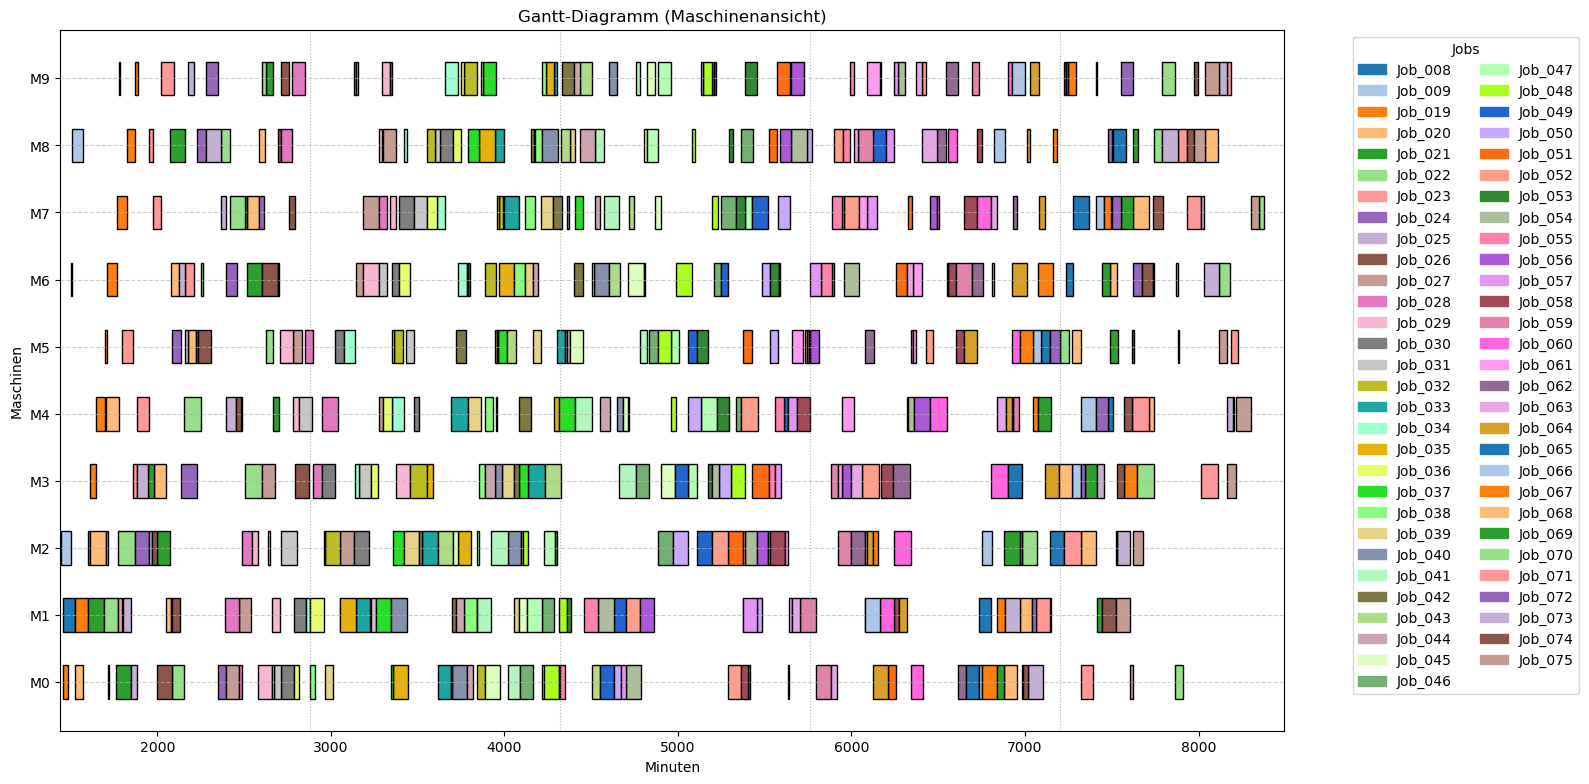

✅ Keine Maschinenkonflikte gefunden
✅ Für alle Jobs ist die Operationssequenz korrekt.
✅ Alle Operation starten erst nach Arrival des Job
✅ Zeitliche technologische Reihenfolge korrekt.

✅ Alle Constraints wurden erfüllt.



True

In [40]:
show.plot_gantt_machines(df_reschedule)
check.check_all_constraints(df_reschedule)

### c) Simulation

In [71]:
# Auf einen Tag filtern
filt = (df_reschedule["Start"] >=  day_start) & (df_reschedule["Start"] < day_end)
df_plan_single_day = df_reschedule[filt]
df_plan_single_day

,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_008,1,748.04,M1,1455.58,69.0,776.54,1524.58
1,Job_009,2,781.95,M2,1442.23,61.0,721.28,1503.23
2,Job_009,3,781.95,M6,1503.23,7.0,728.28,1510.23
3,Job_009,4,781.95,M8,1510.23,64.0,792.28,1574.23
4,Job_019,0,1440.00,M0,1455.58,29.0,44.58,1484.58
...,...,...,...,...,...,...,...,...
154,Job_034,0,2637.28,M2,2637.28,14.0,14.00,2651.28
155,Job_034,1,2637.28,M0,2663.58,6.0,32.30,2669.58
156,Job_034,2,2637.28,M1,2857.58,22.0,242.30,2879.58
174,Job_036,0,2764.04,M0,2788.58,29.0,53.54,2817.58


In [73]:
simulation = ProductionDaySimulation(df_plan_single_day, vc=0.35)
df_execution, df_undone = simulation.run(start_time = day_start, end_time=day_end)

[24:02:13] Job_009 started on M2
[24:15:34] Job_008 started on M1
[24:15:34] Job_019 started on M0
[24:41:40] Job_019 finished on M0 (after 26 minutes 06 seconds)
[25:21:36] Job_008 finished on M1 (after 66 minutes 02 seconds)
[25:22:15] Job_009 finished on M2 (after 80 minutes 01 second)
[25:22:15] Job_009 started on M6
[25:24:34] Job_019 started on M1
[25:26:18] Job_009 finished on M6 (after 04 minutes 04 seconds)
[25:26:18] Job_009 started on M8
[25:28:02] Job_020 started on M0
[25:59:58] Job_020 finished on M0 (after 31 minutes 55 seconds)
[26:23:59] Job_019 finished on M1 (after 59 minutes 25 seconds)
[26:42:34] Job_021 started on M1
[26:42:34] Job_019 started on M2
[26:52:08] Job_019 finished on M2 (after 09 minutes 34 seconds)
[26:52:08] Job_020 started on M2
[26:52:08] Job_019 started on M3
[27:21:21] Job_019 finished on M3 (after 29 minutes 13 seconds)
[27:23:38] Job_009 finished on M8 (after 117 minutes 20 seconds)
[27:27:34] Job_019 started on M4
[27:54:31] Job_019 finished 

In [75]:
df_execution

,Job,Operation,Arrival,Machine,Start,Simulated Processing Time,Flow time,End
0,Job_008,1,748.04,M1,1455.58,66.03,773.57,1521.61
1,Job_009,2,781.95,M2,1442.23,80.02,740.30,1522.25
2,Job_009,3,781.95,M6,1522.25,4.06,744.36,1526.31
3,Job_009,4,781.95,M8,1526.31,117.33,861.69,1643.64
4,Job_019,0,1440.00,M0,1455.58,26.10,41.68,1481.68
...,...,...,...,...,...,...,...,...
103,Job_034,0,2637.28,M2,2637.28,17.09,17.09,2654.37
104,Job_034,1,2637.28,M0,2671.34,8.89,42.95,2680.23
105,Job_034,2,2637.28,M1,2857.58,12.83,233.13,2870.41
106,Job_036,0,2764.04,M0,2788.58,36.52,61.06,2825.10


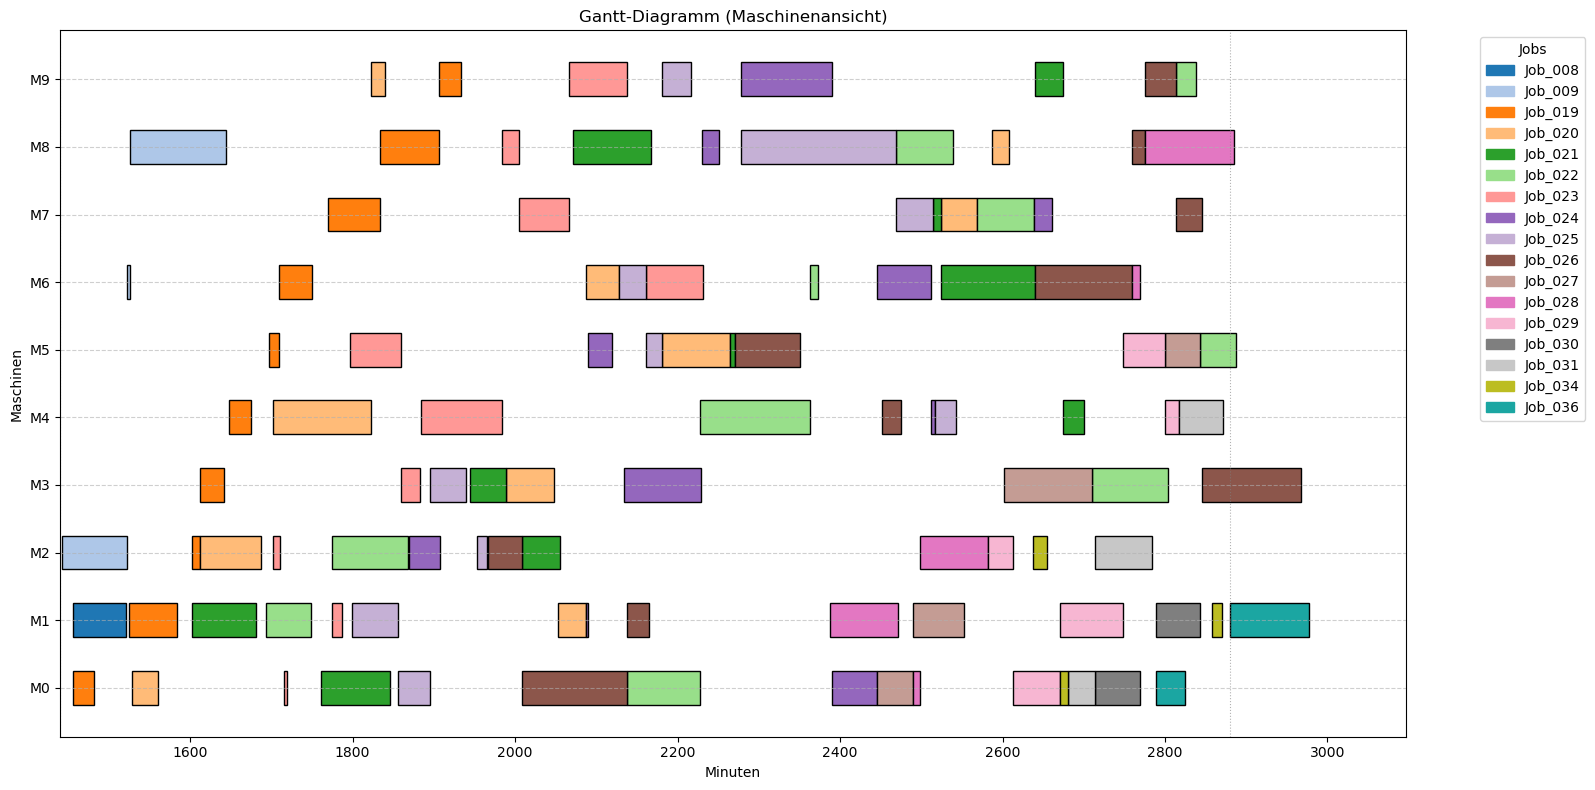

✅ Keine Maschinenkonflikte gefunden
✅ Für alle Jobs ist die Operationssequenz korrekt.
✅ Alle Operation starten erst nach Arrival des Job
✅ Zeitliche technologische Reihenfolge korrekt.

✅ Alle Constraints wurden erfüllt.



True

In [77]:
show.plot_gantt_machines(df_execution, duration_column = "Simulated Processing Time")
check.check_all_constraints(df_execution)

In [79]:
df_undone

,Job,Operation,Arrival,Machine,Planned Start,Processing Time
0,Job_028,5,2221.95,M9,2775.58,76.0
1,Job_028,6,2221.95,M5,2851.58,47.0


## III) Day 2

In [82]:
day_start = 2880
day_end = day_start + 1440
planning_end = day_start + 3*1440

In [97]:
def get_operations_running_into_day(df_execution: pd.DataFrame, day_start: float) -> pd.DataFrame:
    """
    Gibt alle Operationen zurück, deren Endzeit in oder nach dem gegebenen Tagesstart liegt.
    D.h. alle Operationen, die noch aktiv sind oder über den Tageswechsel hinauslaufen.

    Parameter:
    - df_execution: DataFrame mit mindestens der Spalte 'End'.
    - day_start: Startzeit des betrachteten Tages (z.B. 1440.0 für Tag 2 bei Minutenmodellierung).

    Rückgabe:
    - DataFrame mit relevanten Operationen.
    """
    return df_execution[df_execution["End"] >= day_start].copy()

In [103]:
df_execution_important = get_operations_running_into_day(df_execution, day_start)
df_execution_important 

,Job,Operation,Arrival,Machine,Start,Simulated Processing Time,Flow time,End
43,Job_022,9,1647.97,M5,2842.96,44.23,1239.22,2887.19
83,Job_026,9,1955.63,M3,2845.96,121.59,1011.92,2967.55
92,Job_028,4,2221.95,M8,2775.16,110.21,663.42,2885.37
107,Job_036,1,2764.04,M1,2879.58,97.16,212.70,2976.74


### a) Filtern

In [107]:
def filter_jobs_by_arrival_window(
    df_times: pd.DataFrame,
    df_jssp: pd.DataFrame,
    day_start: float,
    planning_end: float,
    arrival_column: str = "Arrival"
) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Filtert Jobs anhand eines Zeitfensters (z.B. Tagesabschnitt) und gibt die passenden
    Datensätze für Ankunftszeiten und JSSP zurück.

    Parameter:
    - df_times: DataFrame mit ['Job', arrival_column], z.B. Ankunftszeiten.
    - df_jssp: DataFrame mit ['Job', 'Operation', 'Machine', 'Processing Time'].
    - day_start: Startzeit des Zeitfensters.
    - planning_end: Endzeit des Zeitfensters.
    - arrival_column: Name der Spalte mit den Ankunftszeiten (Standard: 'Arrival').

    Rückgabe:
    - df_times_filtered: Nur Jobs, deren Arrival im Fenster liegt.
    - df_jssp_filtered: Entsprechende Operationen aus df_jssp.
    """
    time_filter = (df_times[arrival_column] >= day_start) & (df_times[arrival_column] < planning_end)
    df_times_filtered = df_times[time_filter].copy()
    relevant_jobs = df_times_filtered["Job"].unique()
    df_jssp_filtered = df_jssp[df_jssp["Job"].isin(relevant_jobs)].copy()
    return df_jssp_filtered, df_times_filtered

In [109]:
df_jssp_filtered, df_times_filtered = filter_jobs_by_arrival_window(df_times, df_jssp, day_start, planning_end)
df_jssp_filtered

,Job,Operation,Machine,Processing Time
380,Job_038,0,M0,29
381,Job_038,1,M1,78
382,Job_038,2,M2,9
383,Job_038,3,M3,36
384,Job_038,4,M4,49
...,...,...,...,...
945,Job_094,5,M9,76
946,Job_094,6,M5,47
947,Job_094,7,M3,52
948,Job_094,8,M4,90


In [111]:
df_times_filtered 

,Job,Arrival
38,Job_038,2880.00
39,Job_039,2968.05
40,Job_040,3032.78
41,Job_041,3087.97
42,Job_042,3126.61
43,Job_043,3199.39
44,Job_044,3239.74
45,Job_045,3395.63
46,Job_046,3628.04
47,Job_047,3661.95


### a2) eventuelle "Executed" Operations entfernen
> falls vorgezogen

In [113]:
import pandas as pd

def get_unexecuted_operations(
    df_jssp_filtered: pd.DataFrame,
    df_execution: pd.DataFrame
) -> pd.DataFrame:
    """
    Gibt alle Operationen aus df_jssp_filtered zurück, die noch nicht in df_execution enthalten sind.
    Nutzt einen Anti-Join auf ['Job', 'Operation'].

    Parameter:
    - df_jssp_filtered: DataFrame mit geplanten Operationen ['Job', 'Operation', ...].
    - df_execution: DataFrame mit ausgeführten Operationen ['Job', 'Operation', ...].

    Rückgabe:
    - df_jssp_todo: DataFrame mit noch auszuführenden Operationen.
    """
    jssp_keys = df_jssp_filtered[['Job', 'Operation']]
    execution_keys = df_execution[['Job', 'Operation']]

    merged = df_jssp_filtered.merge(
        execution_keys.drop_duplicates(),
        on=['Job', 'Operation'],
        how='left',
        indicator=True
    )

    df_jssp_todo = merged[merged['_merge'] == 'left_only'].drop(columns=['_merge'])
    return df_jssp_todo


In [115]:
df_jssp_todo = get_unexecuted_operations(df_jssp_filtered, df_execution)
df_jssp_todo

,Job,Operation,Machine,Processing Time
0,Job_038,0,M0,29
1,Job_038,1,M1,78
2,Job_038,2,M2,9
3,Job_038,3,M3,36
4,Job_038,4,M4,49
...,...,...,...,...
565,Job_094,5,M9,76
566,Job_094,6,M5,47
567,Job_094,7,M3,52
568,Job_094,8,M4,90


### a3) weitere Operations anhängen
> nicht angefangene

In [117]:
def extend_with_undone_operations(
    df_jssp_todo: pd.DataFrame,
    df_undone: pd.DataFrame
) -> pd.DataFrame:
    """
    Kombiniert noch nicht gestartete Operationen mit abgebrochenen Operationen.
    Achtet auf Einheitlichkeit der Datentypen und entfernt Duplikate.

    Parameter:
    - df_jssp_todo: DataFrame mit geplanten, aber noch nicht ausgeführten Operationen.
    - df_undone: DataFrame mit während des Tages abgebrochenen Operationen.

    Rückgabe:
    - df_jssp_todo_extended: Kombinierter, bereinigter DataFrame.
    """
    # Relevante Spalten aus df_undone
    df_undone_relevant = df_undone[['Job', 'Operation', 'Machine', 'Processing Time']].copy()

    # Einheitlicher Datentyp für 'Job'
    df_undone_relevant['Job'] = df_undone_relevant['Job'].astype(str)
    df_jssp_todo['Job'] = df_jssp_todo['Job'].astype(str)

    # Kombination beider DataFrames
    df_combined = pd.concat([df_undone_relevant, df_jssp_todo], ignore_index=True)

    # Doppelte Operationen entfernen
    df_combined.drop_duplicates(subset=['Job', 'Operation'], inplace=True)

    # Index neu setzen
    df_combined.reset_index(drop=True, inplace=True)

    return df_combined


In [119]:
df_jssp_todo_extended = extend_with_undone_operations(df_jssp_todo, df_undone)
df_jssp_todo_extended

,Job,Operation,Machine,Processing Time
0,Job_028,5,M9,76.0
1,Job_028,6,M5,47.0
2,Job_038,0,M0,29
3,Job_038,1,M1,78
4,Job_038,2,M2,9
...,...,...,...,...
567,Job_094,5,M9,76
568,Job_094,6,M5,47
569,Job_094,7,M3,52
570,Job_094,8,M4,90


In [121]:
import pandas as pd

def update_times_after_operation_changes(
    df_times: pd.DataFrame,
    df_jssp_todo_extended: pd.DataFrame,
    job_column: str = "Job"
) -> pd.DataFrame:
    """
    Aktualisiert df_times basierend auf dem aktuellen Stand von df_jssp_todo_extended.
    Entfernt veraltete Zeiteinträge und ergänzt ggf. fehlende, indem nur Jobs
    berücksichtigt werden, die tatsächlich noch geplante Operationen haben.

    Dies ist notwendig, wenn im Planungsprozess Operationen entfernt oder hinzugefügt wurden.

    Parameter:
    - df_times: Ursprünglicher DataFrame mit Zeiteinträgen (z.B. Ankunftszeiten).
    - df_jssp_todo_extended: Aktueller Satz geplanter Operationen.
    - job_column: Name der Spalte mit der Job-ID (Standard: 'Job').

    Rückgabe:
    - df_times_updated: Bereinigter df_times mit nur noch relevanten Jobs.
    """
    relevant_jobs = df_jssp_todo_extended[job_column].unique()
    df_times_updated = df_times[df_times[job_column].isin(relevant_jobs)].copy()
    return df_times_updated.reset_index(drop=True)


In [123]:
df_times_filtered = update_times_after_operation_changes(df_times, df_jssp_todo_extended)
df_times_filtered

,Job,Arrival
0,Job_028,2221.95
1,Job_038,2880.00
2,Job_039,2968.05
3,Job_040,3032.78
4,Job_041,3087.97
5,Job_042,3126.61
6,Job_043,3199.39
7,Job_044,3239.74
8,Job_045,3395.63
9,Job_046,3628.04


### b) Rescheduling

In [ ]:
df_reschedule = rssv_a.solve_jssp_weighted_individual_flowtime_with_fixed_ops(
    df_jssp_todo_extended, df_times_filtered, df_execution_important, 
    solver_time_limit = solver_limit,
    reschedule_start = day_start
)
df_reschedule

In [ ]:
df_reschedule.to_csv("data/04a_schedule_02.csv", index = False)

In [ ]:
show.plot_gantt_machines(df_reschedule)
check.check_all_constraints(df_reschedule)

### c) Simulation

In [ ]:
# Auf einen Tag filtern
filt = (df_reschedule["Start"] >=  day_start) & (df_reschedule["Start"] < day_end)
df_plan_single_day = df_reschedule[filt]
df_plan_single_day

In [ ]:
simulation = ProductionDaySimulation(df_plan_single_day, vc=0.35)
df_execution, df_undone = simulation.run(start_time = day_start, end_time=day_end)

In [ ]:
show.plot_gantt_machines(df_execution, duration_column = "Simulated Processing Time")
check.check_all_constraints(df_execution)

In [ ]:
df_undone

## IV) Day 3

In [ ]:
day_start = day_start + 1440
day_end = day_start + 1440
planning_end = day_start + 3*1440

In [ ]:
# Operations aus der Simulation, die nun in den nächsten Tag erst abgeschlossen werden
df_execution_important = get_operations_running_into_day(df_execution, day_start)
df_execution_important 

### a) Init_Filter nach Zeitfenster

In [ ]:
df_jssp_filtered, df_times_filtered = filter_jobs_by_arrival_window(df_times, df_jssp, day_start, planning_end)
df_jssp_filtered

### a2) Operations, die evtl. zu früh abgearbeitet wurden, werden entfernt 
> das ist in dieser Simulation nicht der Fall

In [ ]:
df_jssp_todo = get_unexecuted_operations(df_jssp_filtered, df_execution)
df_jssp_todo

### a2) Operations, die ursprünglich schon gestartet sein sollten, aber es nicht sind, werden hinzugefügt

In [132]:
df_jssp_todo_extended = extend_with_undone_operations(df_jssp_todo, df_undone)
df_jssp_todo_extended

,Job,Operation,Machine,Processing Time
0,Job_028,5,M9,76.0
1,Job_028,6,M5,47.0
2,Job_038,0,M0,29
3,Job_038,1,M1,78
4,Job_038,2,M2,9
...,...,...,...,...
567,Job_094,5,M9,76
568,Job_094,6,M5,47
569,Job_094,7,M3,52
570,Job_094,8,M4,90


In [ ]:
# Aufgrund der obigen evtl. Änderungen müssen die Zeiten anhand der final (zu planenden) Operationen neu geladen werden
df_times_filtered = update_times_after_operation_changes(df_times, df_jssp_todo_extended)
df_times_filtered

### b) Rescheduling

In [ ]:
df_reschedule = rssv_a.solve_jssp_weighted_individual_flowtime_with_fixed_ops(
    df_jssp_todo_extended, df_times_filtered, df_execution_important, 
    solver_time_limit = solver_limit,
    reschedule_start = day_start
)
df_reschedule

In [ ]:
df_reschedule.to_csv("data/04a_schedule_03.csv", index = False)

In [ ]:
show.plot_gantt_machines(df_reschedule)
check.check_all_constraints(df_reschedule)

### c) Simulation

In [ ]:
# Auf einen Tag filtern
filt = (df_reschedule["Start"] >=  day_start) & (df_reschedule["Start"] < day_end)
df_plan_single_day = df_reschedule[filt]
df_plan_single_day

In [ ]:
simulation = ProductionDaySimulation(df_plan_single_day, vc=0.35)
df_execution, df_undone = simulation.run(start_time = day_start, end_time=day_end)

In [ ]:
show.plot_gantt_machines(df_execution, duration_column = "Simulated Processing Time")
check.check_all_constraints(df_execution)

In [ ]:
df_undone